In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from scipy import stats
import matplotlib.pyplot as plt
import momepy
from libpysal import graph
from itertools import combinations

pd.set_option('display.max_columns', None)

In [142]:
bldgs = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/freiburg_2D3D_stats.parquet')

In [143]:
stn_gdf = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/stn_gdf_100m.parquet')

In [183]:
stn_gdf.explore()

In [190]:
overlapping = bldgs.sjoin(stn_gdf,predicate='within',how='inner')

In [133]:
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp = temp[temp['variable']=='Ta_deg_C']
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
# Choose all timestamps between 22:00 and 06:00
night = temp[(temp['datetime_UTC'].dt.hour < 6) | (temp['datetime_UTC'].dt.hour > 22)]
night_temp = night[['station_id','value']].groupby(['station_id']).mean()
# merge night_temp and avg_area

# Size

### Area

Block Support - Extensive

In [107]:
bldgs['BuAre']=bldgs.area
BuAre_mean = overlapping.groupby('station_id')['Are'].mean()
BuAre_sum = overlapping.groupby('station_id')['Are'].sum()
BuAre_var = overlapping.groupby('station_id')['Are'].var()

In [134]:
night_temp = night_temp.merge(BuAre_sum, on='station_id')
x = night_temp['Are']
y = night_temp['value']

# frop na from x and corresponding y
y = y.loc[x.isna() == False]
x = x.dropna()
res = stats.linregress(x, y)

In [128]:
res

LinregressResult(slope=0.0014240877419958375, intercept=10.340490174915931, rvalue=0.4712810613103685, pvalue=0.007446735738692835, stderr=0.0004949006422315334, intercept_stderr=0.13946063685800797)

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_4254/65302346.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (x[i], y[i]))


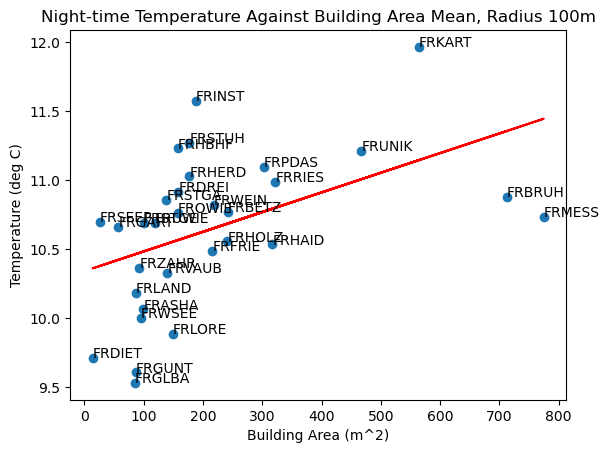

In [132]:
plt.plot(x, res.intercept + res.slope * x, color='red')
plt.scatter(x, y)
plt.xlabel('Building Area (m^2)')
plt.ylabel('Temperature (deg C)')
plt.title('Night-time Temperature Against Building Area Mean, Radius 100m')
for i, txt in enumerate(y.index):
    plt.annotate(txt, (x[i], y[i]))
plt.savefig('/Users/lisawink/Documents/paper1/figures/night_temp_bua.png')
plt.show()

In [135]:
res

LinregressResult(slope=7.370269002782801e-05, intercept=10.308260148575028, rvalue=0.382683600118144, pvalue=0.033606022819563534, stderr=3.304150361957184e-05, intercept_stderr=0.17880718331391218)

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_4254/113659619.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (x[i], y[i]))


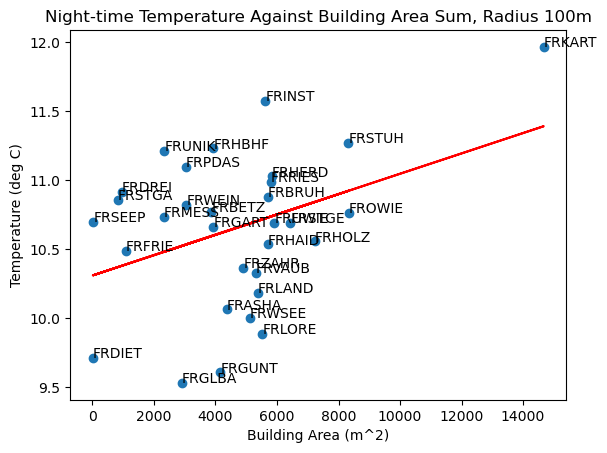

In [136]:
plt.plot(x, res.intercept + res.slope * x, color='red')
plt.scatter(x, y)
plt.xlabel('Building Area (m^2)')
plt.ylabel('Temperature (deg C)')
plt.title('Night-time Temperature Against Building Area Sum, Radius 100m')
for i, txt in enumerate(y.index):
    plt.annotate(txt, (x[i], y[i]))
plt.savefig('/Users/lisawink/Documents/paper1/figures/night_temp_bua.png')
plt.show()

In [111]:
overlapping

,index,oid,aktualit,gebnutzbez,funktion,fktkurz,geometry_x,ssbCCo,ssbCor,ssbSqu,ssbCCM,ssbCCD,sdbAre,sdbPer,sdbCoA,ssbERI,ssbElo,stbOri,mtbSWR,libNCo,ldbPWL,ltcBuA,mtbAli,mtbNDi,ltbIBD,stbCeA,nID,stbSAl,nodeID,id,type,lod,point_count,unique_point_count,surface_count,actual_volume,convex_hull_volume,obb_volume,aabb_volume,footprint_perimeter,obb_width,obb_length,surface_area,orientation_values,orientation_edges,errors,valid,geometry_y,2d_grid_point_count,3d_grid_point_count,circularity_2d,hemisphericality_3d,convexity_2d,convexity_3d,fractality_2d,fractality_3d,rectangularity_2d,rectangularity_3d,squareness_2d,cubeness_3d,horizontal_elongation,min_vertical_elongation,max_vertical_elongation,form_factor_3D,equivalent_rectangularity_index_2d,equivalent_prism_index_3d,proximity_index_2d_,proximity_index_3d,exchange_index_2d,exchange_index_3d,spin_index_2d,spin_index_3d,perimeter_index_2d,circumference_index_3d,depth_index_2d,depth_index_3d,girth_index_2d,girth_index_3d,dispersion_index_2d,dispersion_index_3d,range_index_2d,range_index_3d,roughness_index_2d,roughness_index_3d,shared_walls_area,closest_distance,geometry,bua,Are,Bu_Are,BuAre,index_right,station_id,station_no,station_name,station_long_name,station_type,station_lat,station_lon,station_elevation,mounting_structure,sky_view_factor,dominant_land_use,local_climate_zone,urban_atlas_class,urban_atlas_code,BuAre_mean,BuAre_sum,BuAre_var
5,25,DEBWL0010007TA02,2014-05-05,Gebaeude,Wohnhaus,31001_1010,"POLYGON ((4160123.991 2765463.512, 4160140.593...",0.624482,20,0.582873,9.233234,1.310236,260.633480,72.043286,0.0,0.897413,0.907527,3.194109,0.000000,0,72.754411,1.000000,2.586057,15.087358,15.551957,1.203883,633.0,2.438770,661.0,DEBWL0010007TA02,Building,1,144,48,26,3377.025962,3571.159335,3641.958885,3835.961033,72.021862,15.974471,17.584743,1515.775037,[227.73290916 0. 0. 0. ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,POLYGON Z ((413870.49 5314895.43 290.056000000...,306,3192,0.631020,0.457701,0.945639,0.945639,0.349715,0.256237,0.927255,0.927255,0.896348,0.928392,0.091572,1.0,1.0,1.157193,0.897382,0.936055,0.983987,0.968282,0.900597,-1,0.955995,0.917095,0.794368,0.748281,0.844359,0.798665,0.806548,0.693611,0.902269,0.872083,0.790234,0.703969,0.682929,0.760209,0.000000,7.857192,"POLYGON ((4160123.991 2765463.512, 4160140.593...",0.810811,260.633480,260.633480,260.633480,20,FRLORE,21,Freiburg Loretto,Station Freiburg Loretto (FRLORE),Tier_II,47.981176,7.845321,281.2,Lamp post,0.609,Residential,6 (Open lowrise),Discontinuous dense urban fabric (S.L. : 50% -...,11210,NaN,NaN,NaN
13,35,DEBWL0010007TA0C,2018-12-20,Gebaeude,Wohnhaus,31001_1010,"POLYGON ((4160169.983 2765455.41, 4160169.682 ...",0.586375,16,0.392425,10.295987,1.474788,292.955028,78.046474,0.0,0.877699,0.935890,2.866000,0.095291,0,87.159622,0.818182,7.123135,25.140077,17.153856,6.463312,633.0,2.110660,661.0,DEBWL0010007TA0C,Building,1,108,36,20,3217.586809,3646.344625,4165.740152,4236.895572,78.023738,18.826958,20.133271,1488.628776,[205.47671783 0. 0. 0. ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,POLYGON Z ((413898.71 5314901.14 287.210000000...,420,3180,0.604351,0.441396,0.882414,0.882414,0.348246,0.259845,0.772393,0.772393,0.877202,0.906212,0.064883,1.0,1.0,1.343319,0.877695,0.941831,0.978745,0.915430,0.874610,-1,0.939400,0.811368,0.777400,0.730403,0.802995,0.722992,0.809114,0.598578,0.881523,0.846242,0.765881,0.666040,0.660702,0.779820,32.009142,-0.000000,"POLYGON ((4160169.983 2765455.41, 4160169.682 ...",0.810811,292.955028,292.955028,292.955028,20,FRLORE,21,Freiburg Loretto,Station Freiburg Loretto (FRLORE),Tier_II,47.981176,7.845321,281.2,Lamp post,0.609,Residential,6 (Open lowrise),Discontinuous dense urban fabric (S.L. : 50% -...,11210,NaN,NaN,NaN
28,51,DEBWL0010007TA0U,2012-11-14,Gebaeude,Wohnhaus,31001_1010,"POLYGON ((4160148.03 2765411.054, 4160147.12 2...",0.617493,15,11.799067,8.994641,1.263353,218.053438,62.671978,0.0,0.960232,0.678636,3.378893,0.000000,0,63.799784,0.875000,13.271679,

## Proximity

### Building Adjacency

Neighbourhood Block Support

In [72]:
# create libpysal graph of the buildings in overlapping for each station id

libpysal_graphs = {}
for stn_id in overlapping['station_id'].unique():
    buildings = overlapping[overlapping['station_id'] == stn_id]
    
    # Generate all unique pairs of indices as adjacency list
    adjacency_list = [(i, j) for i, j in combinations(buildings.index, 2)]

    # Add symmetric pairs to make it undirected (i.e., (i, j) and (j, i))
    adjacency_list += [(j, i) for i, j in adjacency_list]

    # Create a DataFrame from the adjacency list
    adjacency_df = pd.DataFrame(adjacency_list, columns=['focal', 'neighbor'])
    adjacency_df['weight'] = 1  # Assign a default weight of 1

    circle_graph = graph.Graph.from_adjacency(adjacency_df)

    libpysal_graphs[stn_id] = circle_graph

    #calculate bua

    contig = graph.Graph.build_contiguity(buildings)
    bua1 = momepy.building_adjacency(contig, circle_graph)

    buildings['bua'] = bua1

    for i in buildings.index:
        overlapping.loc[i, 'bua'] = buildings.loc[i, 'bua']


/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py

In [73]:
overlapping[['geometry','bua']].explore(column='bua', cmap='viridis', legend=True)

In [76]:
bua = overlapping.groupby('station_id')['bua'].mean()
night_temp = night_temp.merge(bua, on='station_id')
x = night_temp['bua']
y = night_temp['value']

# frop na from x and corresponding y
y = y.loc[x.isna() == False]
x = x.dropna()
res = stats.linregress(x, y)

In [97]:
res

LinregressResult(slope=-1.325724258601628, intercept=11.385174179512815, rvalue=-0.540832076756224, pvalue=0.0024520258575198464, stderr=0.3968005866597794, intercept_stderr=0.22894625989828066)

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_4254/3018308404.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (x[i], y[i]))


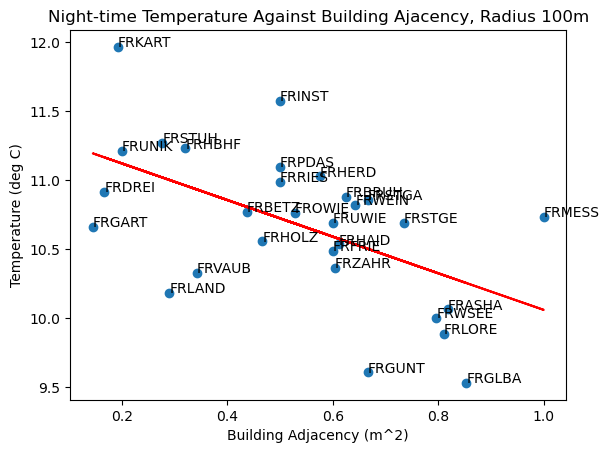

In [104]:
plt.plot(x, res.intercept + res.slope * x, color='red')
plt.scatter(x, y)
plt.xlabel('Building Adjacency (m^2)')
plt.ylabel('Temperature (deg C)')
plt.title('Night-time Temperature Against Building Ajacency, Radius 100m')
for i, txt in enumerate(y.index):
    plt.annotate(txt, (x[i], y[i]))
plt.savefig('/Users/lisawink/Documents/paper1/figures/night_temp_bua.png')
plt.show()

### Mean interbuilding distance

Neighbourhood Block Support

In [178]:
#Neighbourhood Graph Parameters

# create libpysal graph of the buildings in overlapping for each station id

libpysal_graphs = {}
for stn_id in overlapping['station_id'].unique():
    buildings = overlapping[overlapping['station_id'] == stn_id]
    
    # Generate all unique pairs of indices as adjacency list
    adjacency_list = [(i, j) for i, j in combinations(buildings.index, 2)]

    # Add symmetric pairs to make it undirected (i.e., (i, j) and (j, i))
    adjacency_list += [(j, i) for i, j in adjacency_list]

    # Create a DataFrame from the adjacency list
    adjacency_df = pd.DataFrame(adjacency_list, columns=['focal', 'neighbor'])
    adjacency_df['weight'] = 1  # Assign a default weight of 1

    ref_area_graph = graph.Graph.from_adjacency(adjacency_df)

    libpysal_graphs[stn_id] = ref_area_graph

    #calculate ibd
    if len(buildings) <= 1:
        buildings['ibd'] = None
    else:
        delaunay = graph.Graph.build_triangulation(buildings.centroid)
        ibd = momepy.mean_interbuilding_distance(buildings, delaunay, ref_area_graph)
        buildings['ibd'] = ibd

    for i in buildings.index:
        overlapping.loc[i, 'ibd'] = buildings.loc[i, 'ibd']



/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py

In [165]:
delaunay = graph.Graph.build_triangulation(buildings.centroid)

In [168]:
ref_area_graph.explore(buildings)

In [172]:
overlapping[['geometry','ibd']].explore(column='ibd', cmap='viridis', legend=True)

In [174]:
bua = overlapping.groupby('station_id')['ibd'].mean()
night_temp = night_temp.merge(bua, on='station_id')
x = night_temp['ibd']
y = night_temp['value']

# frop na from x and corresponding y
y = y.loc[x.isna() == False]
x = x.dropna()
res = stats.linregress(x, y)

In [175]:
res

LinregressResult(slope=0.0016375917315519432, intercept=10.64409010869049, rvalue=0.034520096247701276, pvalue=0.8589020231474239, stderr=0.009124158937783065, intercept_stderr=0.21539163114006166)

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_4254/2068478078.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (x[i], y[i]))


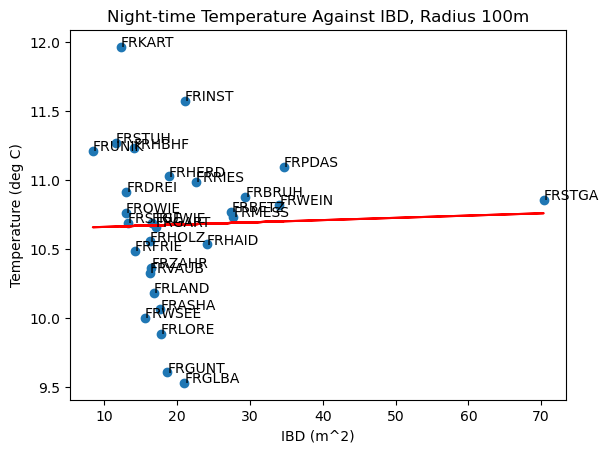

In [177]:
plt.plot(x, res.intercept + res.slope * x, color='red')
plt.scatter(x, y)
plt.xlabel('IBD (m^2)')
plt.ylabel('Temperature (deg C)')
plt.title('Night-time Temperature Against IBD, Radius 100m')
for i, txt in enumerate(y.index):
    plt.annotate(txt, (x[i], y[i]))
plt.savefig('/Users/lisawink/Documents/paper1/figures/night_temp_bua.png')
plt.show()

### Shared walls ratio

Block Support - Intensive

In [180]:
buildings.explore()

In [187]:
momepy.shared_walls(buildings)/buildings.length

33690    0.174480
33691    0.093571
33694    0.465095
33695    0.480000
33696    0.419990
dtype: float64

In [186]:
buildings.length

33690    110.440971
33691    121.827331
33694     82.622731
33695     79.869748
33696     72.809599
dtype: float64

In [191]:
bldgs['SWR']=momepy.shared_walls(bldgs)/bldgs.length
SWR_mean = overlapping.groupby('station_id')['SWR'].mean()

In [192]:
overlapping[['geometry','SWR']].explore(column='SWR', cmap='viridis', legend=True)

In [ ]:
overlapping[['geometry','SWR']].explore(column='SWR', cmap='viridis', legend=True)

In [206]:
night_temp = night_temp.merge(SWR_mean, on='station_id')
x = night_temp['SWR_y']
y = night_temp['value']

# frop na from x and corresponding y
y = y.loc[x.isna() == False]
x = x.dropna()
res = stats.linregress(x, y)

NameError: name 'SWR_mean' is not defined

In [204]:
def plot_temp(x,y,res,param):
    plt.plot(x, res.intercept + res.slope * x, color='red')
    plt.scatter(x, y)
    plt.xlabel(param)
    plt.ylabel('Temperature (deg C)')
    plt.title('Night-time Temperature Against ' + param +', Radius 100m')
    for i, txt in enumerate(y.index):
        plt.annotate(txt, (x[i], y[i]))
    plt.savefig('/Users/lisawink/Documents/paper1/figures/night_temp_'+param+'.png')
    plt.show()

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_4254/766135388.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (x[i], y[i]))


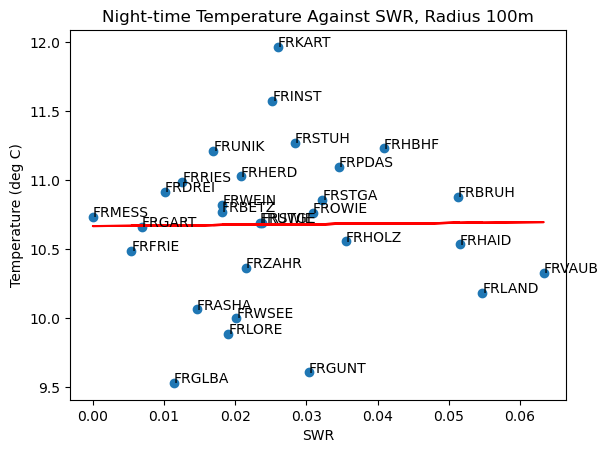

In [205]:
plot_temp(x,y,res,'SWR')